## 과적합 피하기 - 초음파 광물 데이터

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed =2023
np.random.seed(seed)
tf.random.set_seed(seed)

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/sonar.csv', header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [6]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [7]:
# X data: scaling
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.iloc[:, :-1].values)  # 행은 전부 열은 -1까지

In [8]:
# y data: label encoding
from sklearn.preprocessing import LabelEncoder
y_labeled = LabelEncoder().fit_transform(df[60].values)

In [9]:
# dataset 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_labeled, stratify=y_labeled, test_size=0.2, random_state=seed
)

- 모델 정의/설정/학습/평가

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- Case 1) 은닉층 2개

In [11]:
model1 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                4880      
                                                                 
 dense_1 (Dense)             (None, 12)                972       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 5865 (22.91 KB)
Trainable params: 5865 (22.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model1.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist1 = model1.fit(X_train, y_train, validation_split=0.2,
                   epochs=200, batch_size=100, verbose=0)
model1.evaluate(X_test,y_test)


2/2 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.8571


[0.40794867277145386, 0.8571428656578064]

In [13]:
hl1, params1, acc1 = 2, 5865, 0.8095

- Case 2) 은닉층 4개

In [14]:
model2 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                4880      
                                                                 
 dense_4 (Dense)             (None, 48)                3888      
                                                                 
 dense_5 (Dense)             (None, 20)                980       
                                                                 
 dense_6 (Dense)             (None, 8)                 168       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9925 (38.77 KB)
Trainable params: 9925 (38.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model2.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                   epochs=200, batch_size=100, verbose=0)
model2.evaluate(X_test,y_test)


2/2 [==============================] - 0s 6ms/step - loss: 0.4940 - accuracy: 0.8571


[0.4939977526664734, 0.8571428656578064]

In [16]:
hl2, params2, acc2 = 4, 9925, 0.8333

- Case 3) 은닉층 6개

In [17]:
model3 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(64, activation='relu'),
    Dense(40, activation='relu'),
    Dense(24, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 80)                4880      
                                                                 
 dense_9 (Dense)             (None, 64)                5184      
                                                                 
 dense_10 (Dense)            (None, 40)                2600      
                                                                 
 dense_11 (Dense)            (None, 24)                984       
                                                                 
 dense_12 (Dense)            (None, 10)                250       
                                                                 
 dense_13 (Dense)            (None, 4)                 44        
                                                                 
 dense_14 (Dense)            (None, 1)                

In [18]:
model3.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist3 = model3.fit(X_train, y_train, validation_split=0.2,
                   epochs=200, batch_size=100, verbose=0)
model3.evaluate(X_test,y_test)


2/2 [==============================] - 0s 6ms/step - loss: 1.1753 - accuracy: 0.7857


[1.1752753257751465, 0.7857142686843872]

In [19]:
hl3, params3, acc3 = 6, 13947, 0.8333

- Case 4) 은닉층 8개

In [20]:
model4 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(64, activation='relu'),
    Dense(48, activation='relu'),
    Dense(34, activation='relu'),
    Dense(24, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 80)                4880      
                                                                 
 dense_16 (Dense)            (None, 64)                5184      
                                                                 
 dense_17 (Dense)            (None, 48)                3120      
                                                                 
 dense_18 (Dense)            (None, 34)                1666      
                                                                 
 dense_19 (Dense)            (None, 24)                840       
                                                                 
 dense_20 (Dense)            (None, 16)                400       
                                                                 
 dense_21 (Dense)            (None, 10)               

                                                                 
 dense_22 (Dense)            (None, 4)                 44        
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 16309 (63.71 KB)
Trainable params: 16309 (63.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model4.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, validation_split=0.2,
                   epochs=200, batch_size=100, verbose=0)
model4.evaluate(X_test,y_test)


2/2 [==============================] - 0s 4ms/step - loss: 0.7665 - accuracy: 0.8571


[0.7664803862571716, 0.8571428656578064]

In [22]:
hl4, params4, acc4 = 8, 16309, 0.8333

- 케이스 비교

In [23]:
rf = pd.DataFrame({
    '은닉층 갯수': [hl1, hl2, hl3, hl4],
    '파라메터 갯수': [params1, params2, params3, params4],
    '정확도': [acc1, acc2, acc3, acc4]
})
rf

,은닉층 갯수,파라메터 갯수,정확도
0,2,5865,0.8095
1,4,9925,0.8333
2,6,13947,0.8333
3,8,16309,0.8333


- 학습과정 시각화

In [24]:
y_acc1 = hist1.history['accuracy']
y_acc2 = hist2.history['accuracy']
y_acc3 = hist3.history['accuracy']
y_acc4 = hist4.history['accuracy']
y_vloss1 = hist1.history['val_loss']
y_vloss2 = hist2.history['val_loss']
y_vloss3 = hist3.history['val_loss']
y_vloss4 = hist4.history['val_loss']
xs = np.arange(1, len(y_acc1)+1)

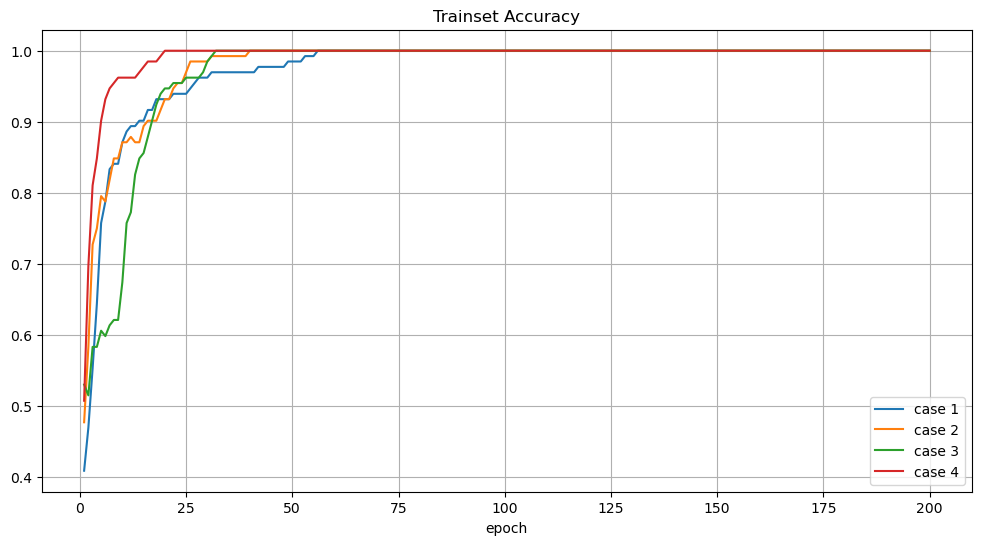

In [25]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_acc1, label='case 1')
plt.plot(xs, y_acc2, label='case 2')
plt.plot(xs, y_acc3, label='case 3')
plt.plot(xs, y_acc4, label='case 4')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.title('Trainset Accuracy')
plt.show()

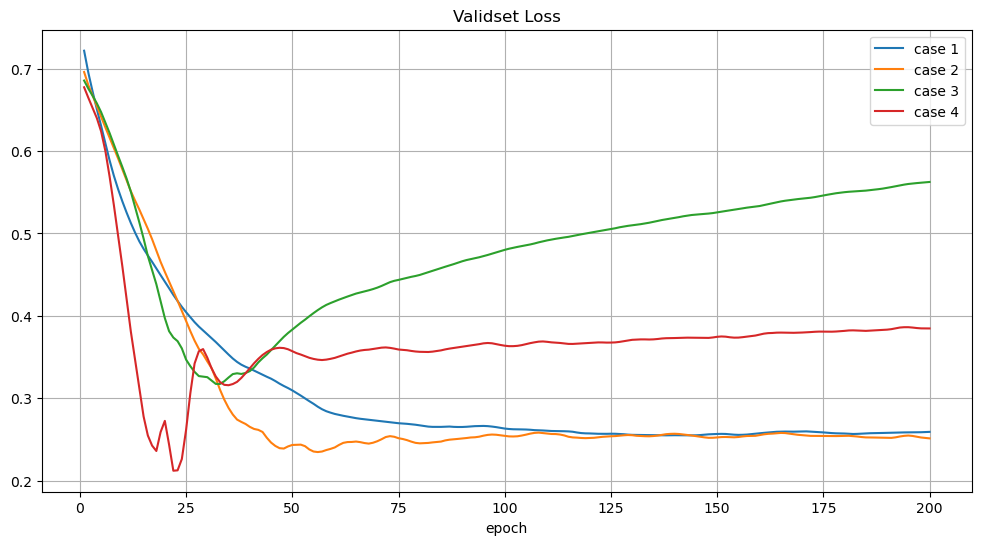

In [26]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_vloss1, label='case 1')
plt.plot(xs, y_vloss2, label='case 2')
plt.plot(xs, y_vloss3, label='case 3')
plt.plot(xs, y_vloss4, label='case 4')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.title('Validset Loss')
plt.show()

#### Best Model 만들어 저장하고 사용하기

- Case 1) 은닉층 2개

In [27]:
model1b = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1b.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 80)                4880      
                                                                 
 dense_25 (Dense)            (None, 12)                972       
                                                                 
 dense_26 (Dense)            (None, 1)                 13        
                                                                 
Total params: 5865 (22.91 KB)
Trainable params: 5865 (22.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model1b.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [30]:
# best model만 저장하는 callback 함수
from tensorflow.keras.callbacks import ModelCheckpoint
mc1 = ModelCheckpoint('models/sonar_best1.h5', monitor='val_loss',
                      verbose=1, save_best_only=True)

In [31]:
# epoch가 종료될 때 마다 callback 함수를 실행하도록 설정
hist1 = model1b.fit(X_train, y_train, validation_split=0.2,
                    epochs=100, batch_size=100, verbose=0,
                    callbacks=[mc1])


Epoch 1: val_loss improved from inf to 0.83817, saving model to models\sonar_best1.h5

Epoch 2: val_loss improved from 0.83817 to 0.78406, saving model to models\sonar_best1.h5

Epoch 3: val_loss improved from 0.78406 to 0.73660, saving model to models\sonar_best1.h5


c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_loss improved from 0.73660 to 0.69699, saving model to models\sonar_best1.h5

Epoch 5: val_loss improved from 0.69699 to 0.66659, saving model to models\sonar_best1.h5

Epoch 6: val_loss improved from 0.66659 to 0.64131, saving model to models\sonar_best1.h5

Epoch 7: val_loss improved from 0.64131 to 0.61783, saving model to models\sonar_best1.h5

Epoch 8: val_loss improved from 0.61783 to 0.59578, saving model to models\sonar_best1.h5

Epoch 9: val_loss improved from 0.59578 to 0.57476, saving model to models\sonar_best1.h5

Epoch 10: val_loss improved from 0.57476 to 0.55569, saving model to models\sonar_best1.h5

Epoch 11: val_loss improved from 0.55569 to 0.53822, saving model to models\sonar_best1.h5

Epoch 12: val_loss improved from 0.53822 to 0.52139, saving model to models\sonar_best1.h5

Epoch 13: val_loss improved from 0.52139 to 0.50505, saving model to models\sonar_best1.h5

Epoch 14: val_loss improved from 0.50505 to 0.49004, saving model to models\sonar_bes

In [32]:
# best model 불러와서 평가하기
from tensorflow.keras.models import load_model

best_model1 = load_model('models/sonar_best1.h5')
best_model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.4356 - accuracy: 0.8333


[0.4356221556663513, 0.8333333134651184]

In [33]:
best_score = [0.8333]

- Case 2) 은닉층 4개

In [34]:
model2b = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [35]:
model2b.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
mc2 = ModelCheckpoint('models/sonar_best2.h5', monitor='val_loss',
                      verbose=0, save_best_only=True)
hist2 = model2b.fit(X_train, y_train, validation_split=0.2,
                    epochs=100, batch_size=100, verbose=0,
                    callbacks=[mc2])
best_model2 = load_model('models/sonar_best2.h5')
best_model2.evaluate(X_test, y_test)

c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step - loss: 0.4158 - accuracy: 0.8571


[0.4158072769641876, 0.8571428656578064]

In [36]:
best_score.append(0.8571)

- Case 3) 은닉층 6개

In [38]:
model3b = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(64, activation='relu'),
    Dense(40, activation='relu'),
    Dense(24, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])
model3b.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 80)                4880      
                                                                 
 dense_33 (Dense)            (None, 64)                5184      
                                                                 
 dense_34 (Dense)            (None, 40)                2600      
                                                                 
 dense_35 (Dense)            (None, 24)                984       
                                                                 
 dense_36 (Dense)            (None, 10)                250       
                                                                 
 dense_37 (Dense)            (None, 4)                 44        
                                                                 
 dense_38 (Dense)            (None, 1)                

In [39]:
model3b.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
mc3 = ModelCheckpoint('models/sonar_best3.h5', monitor='val_loss',
                      verbose=0, save_best_only=True)
hist3 = model3b.fit(X_train, y_train, validation_split=0.2,
                    epochs=100, batch_size=100, verbose=0,
                    callbacks=[mc3])
best_model3 = load_model('models/sonar_best3.h5')
best_model3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.7388 - accuracy: 0.7619


[0.7388007640838623, 0.761904776096344]

In [40]:
best_score.append(0.7619)

- Case 4) 은닉층 8개

In [43]:
model4b = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(64, activation='relu'),
    Dense(48, activation='relu'),
    Dense(34, activation='relu'),
    Dense(24, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [42]:
model4b.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
mc4 = ModelCheckpoint('models/sonar_best4.h5', monitor='val_loss',
                      verbose=0, save_best_only=True)
hist4 = model4b.fit(X_train, y_train, validation_split=0.2,
                    epochs=100, batch_size=100, verbose=0,
                    callbacks=[mc4])
best_model4 = load_model('models/sonar_best4.h5')
best_model4.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.5116 - accuracy: 0.8810


[0.5115532875061035, 0.8809523582458496]

In [44]:
best_score.append(0.8809)

- case 비교

In [45]:
rf['best model'] = best_score
rf

,은닉층 갯수,파라메터 갯수,정확도,best model
0,2,5865,0.8095,0.8333
1,4,9925,0.8333,0.8571
2,6,13947,0.8333,0.7619
3,8,16309,0.8333,0.8809
